# Analysis of Factors Affecting Happiness - Michelle Kim & Cara Seely

# Summary

This project looks to answer the questions of does one’s age, sex, health, total family income, degree, or marital status coincide with one’s reported happiness level? What life characteristics are most important to one’s happiness? Does money actually equal happiness? Does “happy wife” equal “happy life?” Happiness is extremely subjective, making it a difficult topic to explore. However happiness is fundamental for human well-being, therefore it is important to learn on a deeper level. 

Using data from 2022 in the General Social Survey, this codebook was used to make insightful insights surrounding happiness and what factors affect it. The variables being analyzed: age, sex, health, income, degree, and marital status, are factors that are believed to have the most abundance of data that is also correlated with happiness. The data within these variables were cleaned before conducting analysis, which is featured later in this paper. After cleaning, each variable was analyzed and turned into various visuals. These visualizations consist of statistical tables, bar graphs, kernel density plots, and more. Not only were the correlations looked at between these variables and happiness, but we also compared the variables against each other. 

After analyzing all visualizations and statistics, the data showed that there is a correlation between health status and happiness. For some variables like age, the data showed an even distribution across age groups, which suggests that happiness levels vary and don’t have a strong correlation. The data was also broken down by sex, giving a deeper understanding of how marital status, gender and happiness all intersect. These findings have helped exemplify a broader understanding of how health, age, education, marital status, and sex are related to happiness or as many would consider, human-well being. 

# Data, Key Variables, & Cleaning

This part of the paper is dedicated to explaining the data and key variables in the analysis, as well as the data cleaning methods that went along in this project. Before beginning cleaning, the data was read by first importing necessary libraries such as matplotlib.pyplot and seaborn for visualizations, as well as a few other libraries. Having to read three separate files was initially troubling, but by using a for loop and read_parquet, the code is able to read the different chunks of data. The data from these three files were then saved into a single csv file. After processing the data, the code then searches and stores the data for only the specific columns that were deemed necessary.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

/Users/michellekim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/michellekim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/michellekim/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
!pip install fastparquet
!pip install pyarrow
!pip install matplotlib
!pip install --upgrade seaborn pandas
!pip install --upgrade seaborn
!pip install --upgrade matplotlib

In [4]:
# Below is the professor's code chunk for reading in the data
var_list = ['wrkstat', 'prestige'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    #print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    #print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

In [5]:
match = [col for col in df.columns if 'educ' in col]
print("Column names:", match)

Column names: ['educ', 'paeduc', 'maeduc', 'speduc', 'coeduc', 'nateduc', 'nateducy', 'nateducz', 'educop', 'coneduc', 'coneducy', 'sexeduc', 'educ1', 'educ2', 'educ3', 'educ4', 'educ5', 'sppaeduc', 'spmaeduc', 'kdeduc1', 'kdeduc2', 'kdeduc3', 'kdeduc4', 'kdeduc5', 'kdeduc6', 'kdeduc7', 'kdeduc8', 'kdeduc9', 'sbeduc', 'voleduc', 'moneduc', 'hrseduc', 'giveduc', 'toteduc', 'valeduc', 'educ30', 'inteduc', 'opeduc', 'richeduc', 'educemp', 'reducemp', 'payeduc', 'immeduc', 'chldeduc', 'sei10educ', 'pasei10educ', 'masei10educ', 'spsei10educ', 'cosei10educ']


In [6]:
unique_responses = df['coninc'].value_counts()
print("Unique Responses:")
print(unique_responses)

na_count = df['coninc'].isna().sum()
print(f"Number of NAs in '{'coninc'}': {na_count}")

Unique Responses:
coninc
168736.29696    702
45360.00000     671
67200.00000     575
55440.00000     554
36960.00000     492
               ... 
3447.00000       10
4556.50000        9
3737.25000        9
4213.00000        8
3613.50000        8
Name: count, Length: 203, dtype: int64
Number of NAs in 'coninc': 2728


Starting with the happiness category, which is the main variable of this analysis. Answer choices for this scale include: ‘pretty happy’, ‘very happy’, ‘not too happy’, and 'unanswered.' The scales of responses were not narrowed down or enlarged, as the scope seemed already sufficient for analysis. In regards to cleaning this variable, the different happiness levels were put into an ordered categorical data type, with predefined categories, which consists of the ones from the codebook. Any NAs or missing data for happiness responses were put into a category named, ‘unanswered.’ We felt it was necessary to put them into a new category to retain all rows of data to ensure that the entire data set is complete and to avoid potential bias.

In [7]:
categories = ['pretty happy', 'very happy', 'not too happy', 'unanswered']
df['happy'] = pd.Categorical(df['happy'], categories=categories, ordered=True)
df['happy'].fillna('unanswered', inplace=True)

/var/folders/r7/8yfx5p116t50w33dph81nh4c0000gn/T/ipykernel_16281/4063559023.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['happy'].fillna('unanswered', inplace=True)


The variables of age, health rank, sex, marital status, and degree were similarly cleaned like happiness. They were categorized into ordered categories, we once again used the codebook to have the categories matching the responses that were used in the General Social Survey. As discussed earlier, we again put any missing values into an ‘unanswered’ category to acknowledge this missing data and ensure consistent data. Prior to completing the graphical and statistical analysis, the unanswered responses were disregarded in the categorical variables as to not interfere with the analysis as well. It is important to note that the health ranking category had the most unanswered responses of the categorical variables, so the analysis comparing the respondent’s health to their happiness has limited data and thus, limited application for its analysis. For the marital status variable, there were five unique responses besides “unanswered”: “married”, “never married”, “separated”, “divorced”, and “widowed”. The latter four responses all indicate that the respondent was neither married nor claiming marital status at the time of completing the survey. To complete the statistical analysis concerning whether marriage coincides with one’s happiness levels, only two indicators of marital status were kept: married and not married.

In [8]:
df = df.dropna(subset=['age'])

cat_health = ['good', 'excellent', 'fair', 'poor', 'unanswered']
df['health'] = pd.Categorical(df['health'], categories=cat_health, ordered=True)
df['health'].fillna('unanswered', inplace=True)

cat_sex = ['female', 'male', 'unanswered']
df['sex'] = pd.Categorical(df['sex'], categories=cat_sex, ordered=True)
df['sex'].fillna('unanswered', inplace=True)


cat_marital = ['married', 'never married', 'divorced', 'widowed', 'separated','unanswered']
df['marital'] = pd.Categorical(df['marital'], categories=cat_marital, ordered=True)
df['marital'].fillna('unanswered', inplace=True)


cat_deg = ['less than high school', 'high school', 'associate/junior college', "bachelor's", 'graduate',
           'unanswered']
df['degree'] = pd.Categorical(df['degree'], categories=cat_deg, ordered=True)
df['degree'].fillna('unanswered', inplace=True)

/var/folders/r7/8yfx5p116t50w33dph81nh4c0000gn/T/ipykernel_16281/3067842985.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['health'].fillna('unanswered', inplace=True)
/var/folders/r7/8yfx5p116t50w33dph81nh4c0000gn/T/ipykernel_16281/3067842985.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

Lastly, the variable of total family income was simple to clean. The values for this column were coded to round the income to two decimal places, which standardizes the data and makes it easier to analyze and read. 

In [9]:
df['coninc'] = df['coninc'].round(2)

In [10]:
df = df.loc[:, ['age', 'sex', 'marital', 'coninc', 'degree', 'happy', 'health']]

In [11]:
df.to_csv('MichelleCara (1).csv', index=False)

# Visualizations & Analysis

Before beginning analysis, we will read the cleaned data file to ensure it's the correct file and then put it into a set data frame. 

In [12]:
df = pd.read_csv('MichelleCara (1).csv', low_memory=False)
print(df)

        age     sex        marital    coninc                    degree  \
0      48.0    male        married  105852.0               high school   
1      25.0    male  never married   72774.0                bachelor's   
2      42.0    male       divorced   59542.0                bachelor's   
3      24.0    male  never married   33079.0               high school   
4      24.0  female        married   72774.0                bachelor's   
...     ...     ...            ...       ...                       ...   
23534  22.0  female  never married   18480.0               high school   
23535  29.0  female        married   45360.0                  graduate   
23536  32.0    male  never married   94080.0  associate/junior college   
23537  49.0  female        married  107520.0                  graduate   
23538  50.0    male        married   67200.0                  graduate   

              happy      health  
0        unanswered        poor  
1      pretty happy  unanswered  
2      pr

Next we will isolate the few variables we want to analyze to make sure the values we are using look as expected. 

In [13]:
# We can first list all of the possible responses given for 'sex':
sex_responses = []
for response in df['sex']:
    if response not in sex_responses:
        sex_responses.append(response)
print(sex_responses)

['male', 'female', 'unanswered']


In [14]:
# We can repeat this for marital status:
marriage_responses = []
for response in df['marital']:
    if response not in marriage_responses:
        marriage_responses.append(response)
print(marriage_responses)

['married', 'never married', 'divorced', 'separated', 'widowed', 'unanswered']


In [15]:
# Education 
education_responses = []
for response in df['degree']:
    if response not in education_responses:
        education_responses.append(response)
print(education_responses)

['high school', "bachelor's", 'associate/junior college', 'graduate', 'less than high school', 'unanswered']


In [16]:
# Income
coninc_responses = []
for response in df['coninc']:
    if response not in coninc_responses:
        coninc_responses.append(response)
print(coninc_responses)

[105852.0, 72774.0, 59542.0, 33079.0, nan, 88211.0, 28668.0, 48516.0, 14334.0, 4852.0, 6616.0, 39695.0, 1764.0, 12129.0, 5734.0, 3087.0, 24258.0, 18745.0, 16539.0, 178266.0, 9924.0, 20950.0, nan, 7939.0, nan, nan, nan, 441.0, nan, 123496.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 3969.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [17]:
# Health
health_responses = []
for response in df['health']:
    if response not in health_responses:
        health_responses.append(response)
print(health_responses)

['poor', 'unanswered', 'good', 'excellent', 'fair']


In [18]:
# Age
age_responses = []
for response in df['age']:
    if response not in age_responses:
        age_responses.append(response)
print(age_responses)

[48.0, 25.0, 42.0, 24.0, 31.0, 46.0, 52.0, 50.0, 32.0, 57.0, 62.0, 66.0, 34.0, 30.0, 27.0, 59.0, 19.0, 23.0, 35.0, 44.0, 78.0, 33.0, 21.0, 77.0, 70.0, 69.0, 26.0, 89.0, 37.0, 68.0, 83.0, 61.0, 72.0, 53.0, 79.0, 58.0, 36.0, 51.0, 56.0, 43.0, 40.0, 82.0, 41.0, 73.0, 85.0, 64.0, 22.0, 39.0, 75.0, 80.0, 49.0, 76.0, 60.0, 74.0, 28.0, 47.0, 63.0, 20.0, 55.0, 18.0, 81.0, 86.0, 67.0, 45.0, 84.0, 38.0, 65.0, 54.0, 29.0, 71.0, 87.0, 88.0]


In [19]:
# Ignoring unanswered/NAs on graphs because it is not relevant for analysis
df = df[df['health'] != 'unanswered']
df = df[df['happy'] != 'unanswered']
df = df[df['marital'] != 'unanswered']
# Cleaning marital column for graph specifics
df['marital'] = df['marital'].apply(lambda x: 'not married' if x != 'married' else x)
# Continuing ignoring unanswered
df = df[df['degree'] != 'unanswered']
df = df[df['sex'] != 'unanswered']

# The Impact of Health and Age on Happiness

To begin, we can see the distribution of health quality across all of the data, without analyzing any certain variables other than health.

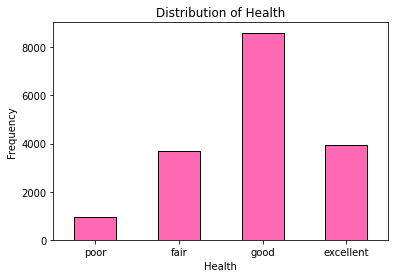

In [20]:
health_order = ['poor', 'fair', 'good', 'excellent']

health_counts = df['health'].value_counts().reindex(health_order)

health_counts.plot(kind='bar', color='hotpink', edgecolor='black')

plt.title('Distribution of Health')
plt.xlabel('Health')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 

plt.show()

As well as the distribution for happiness, to see the entire scope of the data we are working with.

# The impact of age on the gender wage gap:

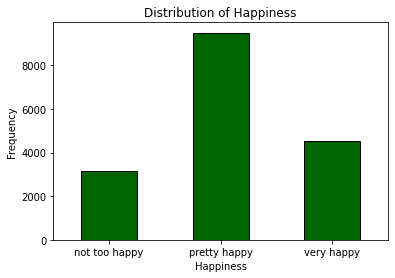

In [21]:
df['happy'].value_counts().sort_index().plot(kind='bar', color='darkgreen', edgecolor='black')
plt.title('Distribution of Happiness')
plt.xlabel('Happiness')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

As mentioned before, we will not look at the 'unanswered' data in our actualy analytical graphs, as it is not necessary in making insights.

In [22]:
df = df[df['health'] != 'unanswered']

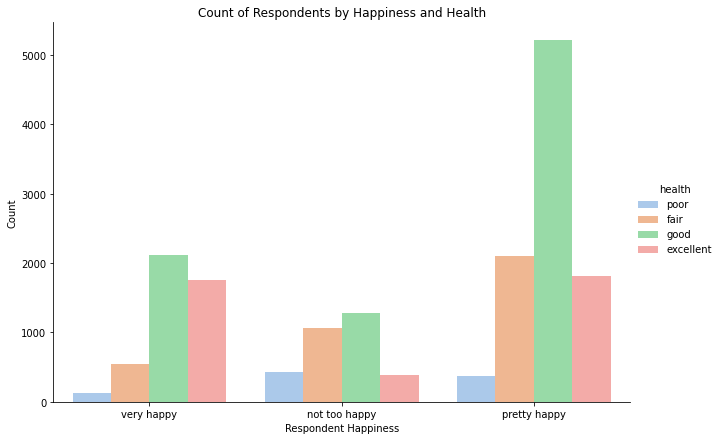

In [23]:
df['health'] = pd.Categorical(df['health'], categories=health_order, ordered=True)

sns.catplot(x='happy', hue='health', data=df, kind='count', height=6, aspect=1.5, palette='pastel')

plt.title('Count of Respondents by Happiness and Health')
plt.xlabel('Respondent Happiness')
plt.ylabel('Count')

plt.show()

Here we can see that the largest number of respondents reported being "pretty happy" and having "good health." Across all levels of happiness, "poor health" has the fewest respondents, which could suggest a general trend that individuals with "poor health are less likely to report high levels of happiness. In conclusion, this graph shows that higher happiness levels are associated with a greater proportion of respondents reporting "good" and "excellent" health.

To begin looking at age, we can first analyze the density of age groups that we are working with. As seen in the kernal density plout, our data evenly consists of most age groups, with the exception of older age groups (75+) and younger (<20).

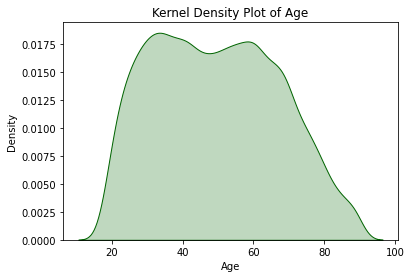

In [24]:
sns.kdeplot(data=df['age'], fill=True, color='darkgreen')
plt.title('Kernel Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

<Axes: xlabel='age', ylabel='Density'>

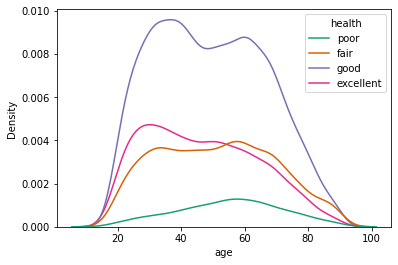

In [25]:
sns.kdeplot(data=df,x='age',hue='health', palette='Dark2')

Here we can see the "excellent" health condition has a high peak and is left-skewed, suggesting that a high density of younger individuals report excellent health, and it decreases with age.The "good" health condition seems to be more evenly distributed across ages, with a peak around middle age, suggesting that "good" health is reported consistently across a wider age range. The "fair" health condition has a lower peak and appears to be more common in middle-aged to older adults, with its distribution slightly right-skewed. The "poor" health condition has the lowest density, which could indicate it's less frequently reported overall. The distribution is right-skewed, implying that it becomes more common as age increases, particularly in the older age range.There seems to be a general trend of health conditions moving from "excellent" to "poor" as age increases. Younger people tend to report better health, while older individuals tend to report "fair" or "poor" health conditions more often.

We can also examine numerical statistics for each of these groups:

In [26]:
df.loc[:,['health','age']].groupby('health').describe()
# Poorest health mean person is around 55 years old

/var/folders/r7/8yfx5p116t50w33dph81nh4c0000gn/T/ipykernel_16281/2876624414.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.loc[:,['health','age']].groupby('health').describe()


age                                                    
            count       mean        std   min   25%   50%   75%   max
health                                                               
poor        932.0  55.152361  16.260380  18.0  44.0  56.0  66.0  89.0
fair       3703.0  51.142047  18.088408  18.0  36.0  51.0  65.0  89.0
good       8604.0  49.308113  17.451956  18.0  35.0  49.0  63.0  89.0
excellent  3949.0  46.659661  17.469111  18.0  32.0  45.0  60.0  89.0

Age and health probably coincide to explains one's lifetime happiness level fluctuations due to the similarity of the two graphs.

<Axes: xlabel='age', ylabel='Density'>

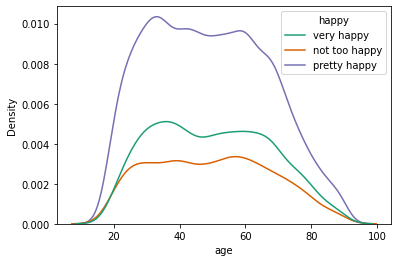

In [27]:
# Graph of age v happiness
sns.kdeplot(data=df,x='age',hue='happy', palette='Dark2')

In [35]:
df.loc[:,['happy','age']].groupby('happy').describe()

age                                                    
                count       mean        std   min   25%   50%   75%   max
happy                                                                    
not too happy  3147.0  49.688910  17.863333  18.0  35.0  50.0  64.0  89.0
pretty happy   9502.0  48.992949  17.687973  18.0  34.0  48.0  63.0  89.0
very happy     4539.0  50.095836  17.399268  18.0  35.0  50.0  64.0  89.0

When these two graphs and sets of data are combined, they suggest that younger individuals tend to report higher happiness and better health, which both appear to decrease with age. However, there is also a presence of happiness among the older populations, despite a shift towards lower health ratings. This data shines light on how age-related changes may influence one's sense of happiness and health.

# The Impact of Income and Degree on Happiness

The majority of our data for income (coninc) is coming largely from families that have incomes on the lower end of the scale.

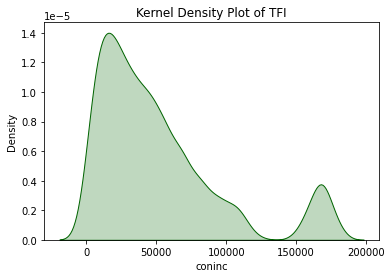

In [48]:
sns.kdeplot(data= df['coninc'], fill=True, color='darkgreen')
plt.title('Kernel Density Plot of TFI')
plt.xlabel('coninc')
plt.ylabel('Density')
plt.show()

Like in the previous section, we can look for any visual trends that stand out.

<Axes: xlabel='coninc', ylabel='Density'>

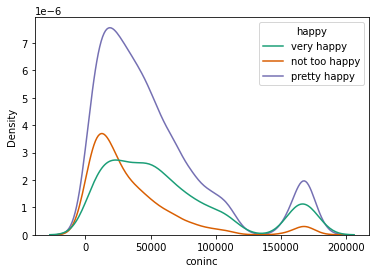

In [30]:
sns.kdeplot(data=df,x='coninc',hue='happy', palette='Dark2')

The highest point on each curve represents the most common income range for each level of happiness. For instance, "pretty happy" individuals most commonly fall into the lower income range, just like the "not too happy" individuals, but the mode of their income is slightly higher. Those who are "very happy" have another peak at a higher income range, suggesting that there is a significant number of very happy individuals at this higher income level as well. The "not too happy" group has a narrower peak and doesn't show as much presence in the higher income range, indicating that fewer people in this group reach the higher income levels.

There may be a correlation between income and happiness, as the "very happy" group extends further into higher income levels compared to the "not too happy" group, but the "pretty happy" group seems to have the widest distribution, implying that factors other than income may have a strong influence on the reported level of happiness. We will create a boxplot to further visualize this data.

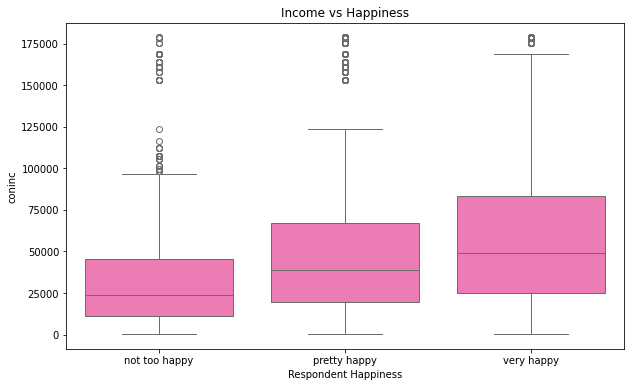

In [49]:
happiness_order = ['not too happy', 'pretty happy', 'very happy']
plt.figure(figsize=(10, 6))
sns.boxplot(x='happy', y='coninc', data=df, order=happiness_order,
            color="hotpink")
plt.xlabel('Respondent Happiness')
plt.ylabel('coninc')
plt.title('Income vs Happiness')
plt.show()

There are outliers in all categories, but they are most notable in the "not too happy" and "very happy" categories. This indicates that there are people with high incomes in all happiness categories. While there seems to be a trend that higher income corresponds with higher levels of happiness, there are clearly exceptions, as seen by the outliers. This means that while there may be a general correlation, income is not the sole determinant of happiness.

In [34]:
df.loc[:,['happy','coninc']].groupby('happy').describe()

coninc                                                       \
                count          mean           std    min      25%      50%   
happy                                                                        
not too happy  2804.0  34572.906915  35197.770383  336.0  10920.0  23595.0   
pretty happy   8593.0  51531.176877  44142.944682  336.0  19277.5  38555.0   
very happy     4074.0  62245.232408  48640.708493  336.0  25200.0  49005.0   

                                   
                   75%        max  
happy                              
not too happy  45360.0  178712.46  
pretty happy   67200.0  178712.46  
very happy     83050.0  178712.46

Overall, it is evident that higher income tends to lead to greater happiness levels, however, a lot of outliers are seen with higher total family income values who also answered they were not too happy (least happiest response). Despite the outliers, there is a general trend showing that higher income correlates with a happier state. We will look into degrees, which is strongly correlated with income.

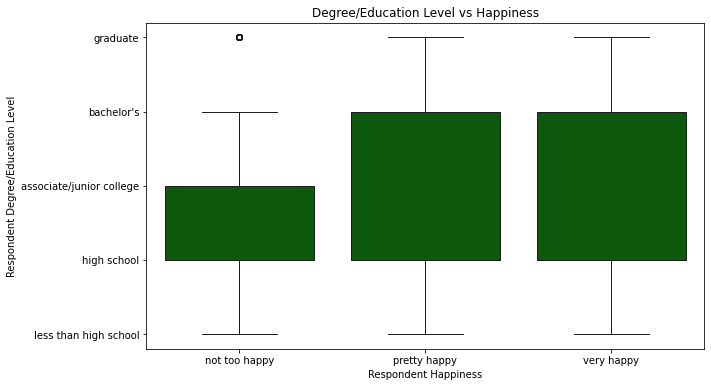

In [37]:
educ_order = ['graduate',  "bachelor's",  'associate/junior college',
              'high school', 'less than high school']
df['degree'] = pd.Categorical(df['degree'], categories=educ_order,
                              ordered=True)
plt.figure(figsize=(10, 6))
sns.boxplot(x='happy', y='degree', data=df, order=happiness_order,
            hue_order=educ_order, color="darkgreen")
plt.xlabel('Respondent Happiness')
plt.ylabel('Respondent Degree/Education Level')
plt.title('Degree/Education Level vs Happiness')
plt.show()

The box plot suggests there could be a positive correlation between the level of education and reported happiness. As the education level increases, the median value of reported happiness appears to increase as well. This correlation goes along with our analysis above with income. Those with a high school education or less show a wider range in happiness levels than those with higher education, suggesting that higher education may be associated with not just increased happiness but also a more consistent level of happiness.

There are outliers in the graduate category, indicating that there are some individuals with graduate degrees who are "not too happy." This might suggest that higher education is not a guaranteed path to happiness for everyone.

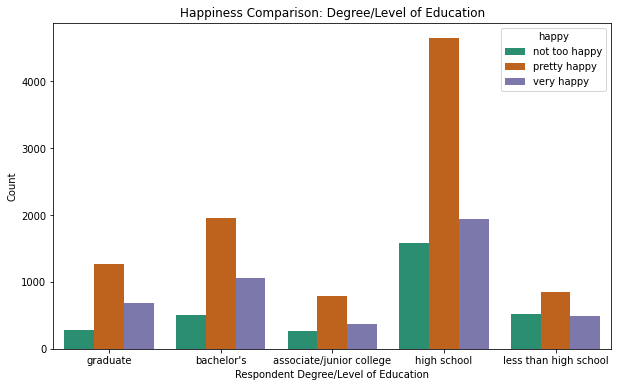

In [38]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x='degree', hue='happy', data=df, order=educ_order,
              hue_order=happiness_order,  palette="Dark2")
plt.xlabel('Respondent Degree/Level of Education')
plt.ylabel('Count')
plt.title('Happiness Comparison: Degree/Level of Education')
plt.show()
     

Even at the lower education levels (high school and less than high school), there is a significant count of respondents who report being "pretty happy" and "very happy," indicating that while there might be a trend towards higher happiness with more education, it is not absolute.

There appears to be a higher count of respondents in the high school and bachelor's categories overall, which may reflect the general education demographics of the population from which the respondents were drawn.

The data can be further shown through statistics below:

In [39]:
df.loc[:,['happy','degree']].groupby('happy').describe()
# Doesn't really give us anything

degree                          
               count unique          top  freq
happy                                         
not too happy   3147      5  high school  1582
pretty happy    9502      5  high school  4645
very happy      4539      5  high school  1936

Overall, when considering both graphs, it appears that higher levels of education are associated with higher self-reported happiness. Both the box plot and the bar chart suggest that individuals with graduate and bachelor's degrees are more likely to report being "pretty happy" or "very happy" compared to those with lower education. However, there are numbers of individuals reporting happiness across all education levels, indicating that while there may be a positive correlation between education and happiness, education is not the sole determinant of one's happiness.

# The Impact of Marital Status and Sex on Happiness

Like in previous sections, we will start by looking at the distribution of respondents.

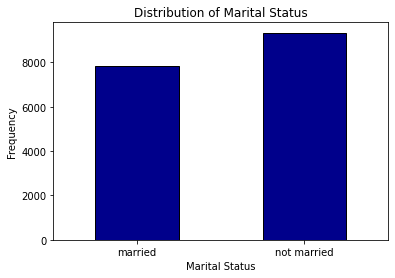

In [41]:
df['marital'].value_counts().sort_index().plot(kind='bar',
                                              color='darkblue', edgecolor='black')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  
plt.show()

From this, it appears that most respondents are not married, however married is not far behind in frequency, giving us a fairly even split. We will also breakdown the demographic data further by looking at sex, as it can provide additional context to these social patterns. Understanding the distribution of males and females in the sample might offer insights into whether marital status distribution is influenced by gender or if it's relatively consistent across both genders.

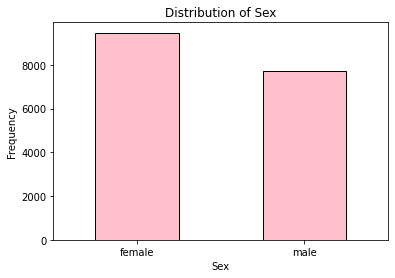

In [42]:
df['sex'].value_counts().sort_index().plot(kind='bar',
                                              color='pink', edgecolor='black')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  
plt.show()

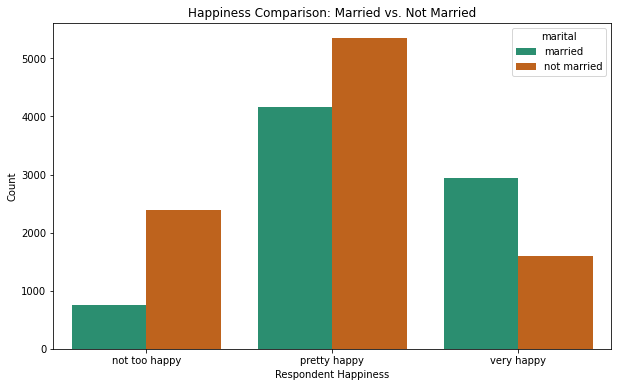

In [43]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x='happy', hue='marital', data=df, order=happiness_order,
              palette="Dark2")
plt.xlabel('Respondent Happiness')
plt.ylabel('Count')
plt.title('Happiness Comparison: Married vs. Not Married')
plt.show()

In [44]:
df.loc[:,['happy','marital']].groupby('happy').describe()
# More pretty and very happy people are married

marital                          
                count unique          top  freq
happy                                          
not too happy    3147      2  not married  2393
pretty happy     9502      2  not married  5347
very happy       4539      2      married  2938

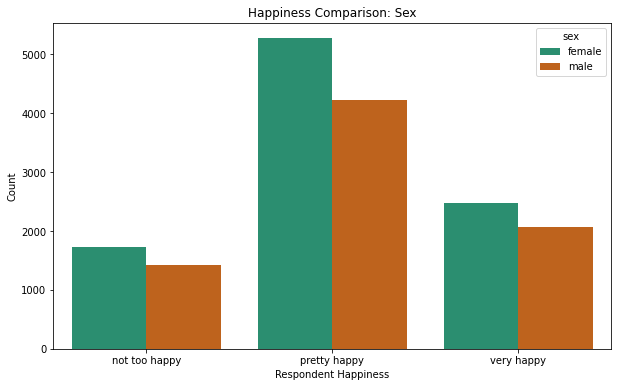

In [46]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x='happy', hue='sex', data=df, order=happiness_order,
              palette="Dark2")
plt.xlabel('Respondent Happiness')
plt.ylabel('Count')
plt.title('Happiness Comparison: Sex')
plt.show()

Females make up the greatest percent in each happpiness level (perhaps this is due to more women completing the survey than men). Women are more unhappy but also more VERY happy.

In [47]:
df.loc[:,['happy','sex']].groupby('happy').describe()
# Females dominate all categories of happiness

sex                     
              count unique     top  freq
happy                                   
not too happy  3147      2  female  1722
pretty happy   9502      2  female  5276
very happy     4539      2  female  2471

From the bar graphs and data, we can see the largest group for both married and not married individuals falls into the "pretty happy" category. Married respondents do have a higher count in the "very happy" category than those who are not married. There's a notable number of not married individuals who are "not too happy" compared to their married counterparts. Being married may be associated with a greater likelihood of being "very happy," although most respondents, regardless of marital status, report being "pretty happy."

# Conclusion 

To answer our research question of “Does more money actually equal happiness?”, our data yields us with the oversimplified answer of yes, it does in many cases. The goal of this project was to determine what life factors contribute or inhibit happiness, such as age, sex, health, income, education, and marital status. It aims to understand which of these characteristics are most correlated with happiness, examine the relationship between money and happiness and “happy wife, happy life.” In order to do so, using the codebook, variables believed to have the largest impact on happiness were selected, cleaned and then used to create a range of visualizations. 

Key findings from our analysis include a clear correlation between health status and happiness. This suggests that those who report better health, tend to also report higher levels of happiness. On the other hand, age did not show a strong correlation with happiness. The distribution across different age groups was pretty even, therefore no clear trend was found. For income, despite there being outliers, there was a correlation seen which showed higher incomes typically came with higher happiness levels. With this, since income is extremely correlated with degree, education levels did have an impact on happiness as well. Lastly, it was determined that those who are married tend to be on the more happier side, but overall the data showed that regardless of marital status, most respondents had higher happiness levels. 

Although happiness can be subjective, it is a critical aspect of humans that researchers have been able to study. This project leverages the General Social Survey, which is a reputable, widely used, and extremely informative. With this data and analysis, this project does indeed provide empirical insights. By using standardized survey questions and a range of numerous variables, this project does determine and reflect determinants of happiness. The findings are rooted in statistical data and analysis, making our results credible. While acknowledging that happiness varies based on individual experiences, this study utilizes a diverse population using statistical methods and various factors. 

Due to the scope of this project, there are aspects of happiness that were unable to be explored. A long-term research could give deeper insights into how the factors affect happiness, and how happiness levels change over time. This additional work could shed light on if the happiness is consistent or temporary when correlated with certain variables. Another project that could not be touched on is looking into more psychological variables. The variables used in this analysis were more social related and investigating psychological traits could give a deeper understanding of happiness. 
